In [35]:
import pandas as pd
import numpy as np

In [36]:
df=pd.read_csv("diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [38]:
df["gender"]=df["gender"].map({"Female":0,"Male":1})
df["smoking_history"]=df["smoking_history"].map({"never":0,"current":1,"former":2,"not current":3})

In [39]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0,1,0.0,25.19,6.6,140,0
1,0.0,54.0,0,0,NaN,27.32,6.6,80,0
2,1.0,28.0,0,0,0.0,27.32,5.7,158,0
3,0.0,36.0,0,0,1.0,23.45,5.0,155,0
4,1.0,76.0,1,1,1.0,20.14,4.8,155,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               99982 non-null   float64
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      60180 non-null   float64
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 6.9 MB


In [41]:
df.dropna(inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60169 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               60169 non-null  float64
 1   age                  60169 non-null  float64
 2   hypertension         60169 non-null  int64  
 3   heart_disease        60169 non-null  int64  
 4   smoking_history      60169 non-null  float64
 5   bmi                  60169 non-null  float64
 6   HbA1c_level          60169 non-null  float64
 7   blood_glucose_level  60169 non-null  int64  
 8   diabetes             60169 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 4.6 MB


In [43]:
from sklearn.model_selection import train_test_split
x=df.drop("diabetes",axis=1)
y=df["diabetes"]



In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [45]:
x_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
19849,0.0,53.0,0,0,0.0,27.70,6.6,126
5435,0.0,44.0,0,0,1.0,35.74,6.0,300
56542,1.0,62.0,0,0,0.0,27.72,5.8,100
67637,0.0,71.0,0,0,0.0,26.88,5.0,85
13282,0.0,19.0,0,0,0.0,23.23,6.2,90


In [46]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="entropy",max_depth=7)

In [47]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [48]:
y_pred=dt.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9622735582516204

[Text(0.5, 0.9375, 'x[6] <= 6.7\nentropy = 0.499\nsamples = 48135\nvalue = [42851, 5284]'),
 Text(0.4375, 0.8125, 'x[7] <= 210.0\nentropy = 0.337\nsamples = 45710\nvalue = [42851, 2859]'),
 Text(0.375, 0.6875, 'x[6] <= 5.35\nentropy = 0.236\nsamples = 44578\nvalue = [42851, 1727]'),
 Text(0.3125, 0.5625, 'entropy = 0.0\nsamples = 17748\nvalue = [17748, 0]'),
 Text(0.4375, 0.5625, 'x[7] <= 113.0\nentropy = 0.345\nsamples = 26830\nvalue = [25103, 1727]'),
 Text(0.375, 0.4375, 'entropy = 0.0\nsamples = 7743\nvalue = [7743, 0]'),
 Text(0.5, 0.4375, 'x[1] <= 45.5\nentropy = 0.438\nsamples = 19087\nvalue = [17360, 1727]'),
 Text(0.25, 0.3125, 'x[5] <= 30.675\nentropy = 0.177\nsamples = 9164\nvalue = [8920, 244]'),
 Text(0.125, 0.1875, 'x[2] <= 0.5\nentropy = 0.114\nsamples = 7119\nvalue = [7010, 109]'),
 Text(0.0625, 0.0625, 'entropy = 0.107\nsamples = 7027\nvalue = [6928, 99]'),
 Text(0.1875, 0.0625, 'entropy = 0.496\nsamples = 92\nvalue = [82, 10]'),
 Text(0.375, 0.1875, 'x[1] <= 30.5\nent

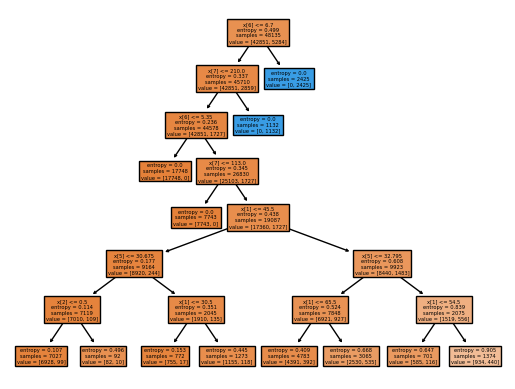

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


plot_tree(dt,filled=True)

In [53]:
#grid search
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dt2=DecisionTreeClassifier()



In [54]:
a={"criterion":["gini","entropy"],
   "max_depth":[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]}

In [55]:
search=GridSearchCV(dt2,param_grid=a,scoring="accuracy")

In [56]:
search.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16]},
             scoring='accuracy')

In [57]:
search.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [58]:
tree=DecisionTreeClassifier(criterion="entropy",max_depth=9)

In [59]:
tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [60]:
y_pred=tree.predict(x_test)

In [61]:
accuracy_score(y_test,y_pred)

0.9626059498088748